## Instituto Federal do Sudeste de Minas Gerais, Campus Barbacena
### Projeto Laboratório de Redes de Conhecimento

## Curso de Mineração de Dados Aplicada

Prof. Rafael José de Alencar Almeida
<rafael.alencar@ifsudestemg.edu.br>

<br>

## Aula 5:  Transformação de dados

- É comum as features (colunas) possuírem faixas de valor muito diferentes (ex.: altura e idade) 
- Nem sempre a distruição dos dados é uma distribuição normal (gaussiana)
- A maioria dos modelos de mineração de dados beneficia-se de dados de entrada que estejam bem escalados e distribuídos

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import *

### Dataset para testes

Red Wine Dataset

In [2]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/wine-quality-classifier/dados/winequality-red.csv', sep=';')
df_wine.head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Distribuição das features
df_wine.describe()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Normalizer
Normaliza os valores de cada linha

In [4]:
nm = Normalizer()
pd.DataFrame(
    nm.fit_transform(df_wine),
    columns=df_wine.columns
).head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


### StandardScaler

- Normaliza os valores das colunas para uma distribuição mais próxima da normal. 

- É a transformação mais utilizada antes de enviar os dados para um modelo.

<img src="./img/standardscaler.png">

<strong>Fonte:</strong> http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [5]:
std = StandardScaler()
pd.DataFrame(
    std.fit_transform(df_wine),
    columns=df_wine.columns
).head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


### MinMaxScaler

Normaliza todos valores em uma faixa de valores definida por <code>feature_range</code>.

In [6]:
mm = MinMaxScaler(feature_range=(0, 1))
pd.DataFrame(
    mm.fit_transform(df_wine),
    columns=df_wine.columns
).head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4



## Redução de dimensionalidade

- Consiste em se reduzir o número de colunas matriz de dados, preservando o máximo de informação.
- Útil para quando o dataset é muito grande, possui muito ruído e quando se quer visualizar mais de 3 dimensões.
- Diversas técnicas: PCA, NMF, SVD, ICA, etc.

### PCA (Principal Component Analysis)

- PCA é uma das mais comuns, e tem como vantagem ser determinística.

<img src="http://www.sthda.com/sthda/RDoc/figure/factor-analysis/principal-component-analysis-basics-scatter-plot-data-mining-1.png">

In [7]:
# Classifica as notas(3 a 5 = 0; 6 a 8 = 1)
df_wine['Qualidade'] = df_wine['Qualidade'].apply(lambda x: 0 if x < 6 else 1)

# Exibe gráfico
df_wine.groupby('Qualidade').count()['Álcool'].plot(kind='bar', title='Vinhos bons(1) e ruins(0)')

In [8]:
# Normaliza os dados
df_std = pd.DataFrame(
    StandardScaler().fit_transform(df_wine.drop(['Qualidade'], axis=1)),
    columns=df_wine.columns.drop(['Qualidade'])
)

df_std['Qualidade'] = df_wine['Qualidade']

df_std.head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit_transform(
    df_std.drop(['Qualidade'], axis=1)
)

array([[-1.61952988,  0.45095009],
       [-0.79916993,  1.85655306],
       [-0.74847909,  0.88203886],
       ...,
       [-1.45612897,  0.31174559],
       [-2.27051793,  0.97979111],
       [-0.42697475, -0.53669021]])

In [10]:
# Variação explicada dos dados
print(pca.explained_variance_ratio_)

print('O PCA conseguir explicar {0}% da variação dos dados'.format(
        pca.explained_variance_ratio_.sum() * 100
    ))

[0.28173931 0.1750827 ]
O PCA conseguir explicar 45.682201184294094% da variação dos dados


In [11]:
# Visualizando a distribuição dos vinhos por qualidade

pca = PCA(n_components=2)

df_pca = pca.fit_transform(
    df_std.drop(['Qualidade'], axis=1)
)
df_pca = pd.DataFrame(df_pca)

df_pca['Qualidade'] = df_wine['Qualidade']
df_pca.head()

,0,1,Qualidade
0,-1.619530,0.450950,0
1,-0.799170,1.856553,0
2,-0.748479,0.882039,0
3,2.357673,-0.269976,1
4,-1.619530,0.450950,0


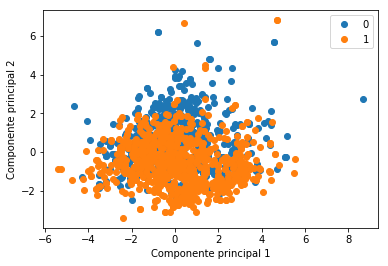

In [12]:
from matplotlib import pyplot as plt

groups = df_pca.groupby('Qualidade')

figure, axes = plt.subplots()
axes.margins(0.05)

for name, group in groups:
    axes.plot(group[0], group[1], marker='o', linestyle='', ms=6, label=name)

axes.legend()
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

### Exercício

Gere uma visualização 3D do dataset de vinhos.


## Modelagem de tópicos (topic modeling)

- Consiste em se reduzir a dimensionalidade de uma representação vetorial de textos para obter os assuntos semânticos (tópicos) mais relevantes.
- Diversas técnicas (NMF, LDA, etc.)

### NMF (Non-Negative Matrix Factorization)

Fatora uma matriz M em duas sub-matrizes não negativas W e H, onde X =~ W * H

<img src="./img/nmf.png">

In [13]:
from sklearn.decomposition import NMF

df = pd.read_csv('./data/df_noticias_if.csv')
df.head()

,data,titulo,conteudo
0,14/09/2017,Campus Barbacena divulga Resultado Provisório ...,\n\n\tO Campus Barbacena divulgou o Resultado ...
1,14/09/2017,Divulgado o Edital de convocação de assembleia...,\n\n\tDivulgado o Edital de convocação de asse...
2,14/09/2017,Pesquisador da Bélgica realiza palestra no Cam...,"\n\n\tO pesquisador da Bélgica, Luc Vankrunkel..."
3,14/09/2017,Divulgada a homologação das inscrições à candi...,\n\n\tDivulgada a homologação das inscrições à...
4,14/09/2017,"Aprovado Regulamento de Eventos, Cerimonial e ...","\n\n\tO Regulamento, aprovado no dia 05 de set..."


In [14]:
df['doc'] = df.apply(lambda row: row['titulo'] + row['data'], axis=1)
df['doc'].head()

0    Campus Barbacena divulga Resultado Provisório ...
1    Divulgado o Edital de convocação de assembleia...
2    Pesquisador da Bélgica realiza palestra no Cam...
3    Divulgada a homologação das inscrições à candi...
4    Aprovado Regulamento de Eventos, Cerimonial e ...
Name: doc, dtype: object

In [15]:
import re
import nltk
from string import punctuation

numbers = '0123456789'
stopwords = nltk.corpus.stopwords.words('portuguese')

def preprocessa(txt):
    txt = txt.lower()
    txt = ''.join([c for c in txt if c not in punctuation + numbers])
    txt = re.sub(r'\n|\r', '', txt)
    txt = re.sub(r' .+? ', ' ', txt)
    txt = ' '.join([t for t in txt.split(' ') if t not in stopwords])
    
    return txt

df['doc'] = df['doc'].apply(preprocessa)
df['doc'].head()

0              campus divulga provisório viii inovação
1    divulgado edital convocação assembleia centro ...
2        pesquisador bélgica palestra campus barbacena
3    divulgada homologação inscrições candidatura c...
4                  aprovado cerimonial protocolo if mg
Name: doc, dtype: object

In [16]:
# Vetorização
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['doc'])

tfidf_matrix.shape

(1000, 1269)

In [17]:
# Topic Modeling
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

num_topics = 5

nmf_model = NMF(n_components=num_topics).fit(tfidf_matrix)

# Matriz de tópicos x documentos (W)
nmf_W = nmf_model.transform(tfidf_matrix)

# Matriz de palavras x tópicos (H)
nmf_H = nmf_model.components_

# Dimensões das matrizes resultantes
print('Matriz W:', nmf_W.shape)
print('Matriz H:', nmf_H.shape)

Matriz W: (1000, 5)
Matriz H: (5, 1269)


In [18]:
# Função para exibir os tópicos
def exibe_topicos(H, W, feature_names, documents, num_top_words, num_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\nTópico %d' % (topic_idx + 1))

        print('   Principais termos: ' + ', '.join([feature_names[i] + ' (%s)' % round(H[topic_idx][i], 2) 
                            for i in topic.argsort()[:-num_top_words - 1:-1]]))       

        # Top documentos relacionados
        print('   Principais notícias relacionadas ao tópico:')

        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:num_top_documents]
        for doc_index in top_doc_indices:

            # Id do documento
            id_doc = int()            
            
            # Texto
            texto = documents.iloc[doc_index]['titulo']
            print('\t-', texto, ' (%s)' % round(W[doc_index][topic_idx], 2))


# Número de palavras mais relacionadas que serão exibidas para cada tópico
num_top_words = 5

# Número de documentos por tópico
num_top_documents = 3

exibe_topicos(nmf_H, nmf_W, tfidf_feature_names, df, num_top_words, num_top_documents)


Tópico 1
   Principais termos: divulgado (1.84), resultado (1.53), edital (0.53), projetos (0.38), cursos (0.29)
   Principais notícias relacionadas ao tópico:
	- Divulgado o Resultado final do Edital 04/2016  (0.34)
	- Divulgado o Resultado da seleção de projetos para o Programa de Monitoria / Edital 002/2016  (0.25)
	- Divulgado o Resultado Final Edital 020/2016 – Projetos de Extensão   (0.25)

Tópico 2
   Principais termos: campus (1.58), realiza (0.69), divulga (0.66), resultados (0.2), participa (0.19)
   Principais notícias relacionadas ao tópico:
	- Campus Barbacena tem medalhistas na premiação da OBMEP 2015  (0.41)
	- Campus Barbacena realiza Colação de Grau   (0.36)
	- Campus Barbacena realiza Colação de Grau   (0.36)

Tópico 3
   Principais termos: atenção (1.78), química (0.38), informações (0.21), técnicos (0.21), agronomia (0.15)
   Principais notícias relacionadas ao tópico:
	- Atenção: Aviso aos formandos 02/2016  (0.48)
	- Atenção alunos dos cursos de graduação   (0.48

## Atividade para casa

Aplicar modelagem de tópicos ao conteúdo de um site ou API, e fazer sua análise.